In [1]:
%pip install pandas numpy seaborn matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\dar\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("..\Datasets\Final_Dataset_DS_ - Final_Dataset_DS_.csv")

In [4]:
df.head()

,id,age,gender,height_cm,weight_kg,bmi,exercise_freq,diet_quality,alcohol_consumption,chronic_disease,...,policy type,previous claims,credit score,insurance duration,premium amount,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,102,18,male,158.4,68.5,27.3,weekly,poor,moderate,no,...,Premium,1,0.0,5,4552,22/10/21,Good,No,Monthly,House
1,107,18,male,167.0,50.4,18.1,daily,excellent,high,no,...,Premium,2,0.0,7,604,14/05/23,Average,Yes,Rarely,Apartment
2,139,18,other,164.7,51.6,19.0,daily,excellent,moderate,no,...,Basic,0,0.0,1,651,26/05/23,Average,Yes,Daily,Apartment
3,145,18,female,162.7,65.7,24.8,daily,poor,high,no,...,Comprehensive,0,0.0,6,628,08/03/22,Poor,Yes,Weekly,House
4,194,18,other,167.9,45.5,16.1,weekly,excellent,low,yes,...,Premium,0,0.0,9,49,09/01/21,Poor,No,Rarely,Condo


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7500 non-null   int64  
 1   age                     7500 non-null   int64  
 2   gender                  7500 non-null   object 
 3   height_cm               7500 non-null   float64
 4   weight_kg               7500 non-null   float64
 5   bmi                     7500 non-null   float64
 6   exercise_freq           7500 non-null   object 
 7   diet_quality            7500 non-null   object 
 8   alcohol_consumption     7500 non-null   object 
 9   chronic_disease         7500 non-null   object 
 10  stress_level            7500 non-null   int64  
 11  sleep_hours             7500 non-null   float64
 12  exercise_score          7500 non-null   int64  
 13  diet_score              7500 non-null   int64  
 14  alcohol_score           7500 non-null   

In [6]:
df.columns

Index(['id', 'age', 'gender', 'height_cm', 'weight_kg', 'bmi', 'exercise_freq',
       'diet_quality', 'alcohol_consumption', 'chronic_disease',
       'stress_level', 'sleep_hours', 'exercise_score', 'diet_score',
       'alcohol_score', 'chronic_score', 'stress_norm', 'sleep_norm',
       'health_lifestyle_score', 'bmi_calc ', 'number of dependents ',
       'health score', 'location', 'policy type', 'previous claims',
       'credit score', 'insurance duration', 'premium amount',
       'Policy Start Date', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type'],
      dtype='object')

In [7]:
object_columns = [ 'gender','exercise_freq',
       'diet_quality', 'alcohol_consumption', 'chronic_disease', 'location', 'policy type','Policy Start Date', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type']

for i in object_columns:
    print(df[i].unique())

['male' 'other' 'female']
['weekly' 'daily']
['poor' 'excellent' 'average' 'good']
['moderate' 'high' 'low']
['no' 'yes']
['Rural' 'Urban' 'Suburban']
['Premium' 'Basic' 'Comprehensive']
['22/10/21' '14/05/23' '26/05/23' ... '02/12/20' '04/10/23' '30/11/22']
['Good' 'Average' 'Poor']
['No' 'Yes']
['Monthly' 'Rarely' 'Daily' 'Weekly']
['House' 'Apartment' 'Condo']


In [8]:
df['Property Type'].replace({'Apartment': 0, 'House': 1, 'Condo': 2}, inplace=True)
df['Property Type'].unique()

C:\Users\dar\AppData\Local\Temp\ipykernel_33608\2951778219.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Property Type'].replace({'Apartment': 0, 'House': 1, 'Condo': 2}, inplace=True)
C:\Users\dar\AppData\Local\Temp\ipykernel_33608\2951778219.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tru

array([1, 0, 2])

In [9]:
df['Exercise Frequency'].replace({'Rarely': 3, 'Daily': 0, 'Weekly': 1, 'Monthly': 2}, inplace=True)
df['Exercise Frequency'].unique()

C:\Users\dar\AppData\Local\Temp\ipykernel_33608\739104436.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Exercise Frequency'].replace({'Rarely': 3, 'Daily': 0, 'Weekly': 1, 'Monthly': 2}, inplace=True)
C:\Users\dar\AppData\Local\Temp\ipykernel_33608\739104436.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_do

array([2, 3, 0, 1])

In [10]:
df['Smoking Status'].replace('No', 0, inplace = True)
df['Smoking Status'].replace('Yes', 1, inplace = True)
df['Smoking Status'].unique()

C:\Users\dar\AppData\Local\Temp\ipykernel_33608\2410296496.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Smoking Status'].replace('No', 0, inplace = True)
C:\Users\dar\AppData\Local\Temp\ipykernel_33608\2410296496.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

array([0, 1])

In [11]:
df['Customer Feedback'].replace({'Good': 2, 'Poor': 0, 'Average': 1}, inplace=True)
df['Customer Feedback'].unique()

C:\Users\dar\AppData\Local\Temp\ipykernel_33608\1202192948.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer Feedback'].replace({'Good': 2, 'Poor': 0, 'Average': 1}, inplace=True)
C:\Users\dar\AppData\Local\Temp\ipykernel_33608\1202192948.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tru

array([2, 1, 0])

In [12]:
df['gender'].replace('female', 1, inplace = True)
df['gender'].replace('male', 0, inplace = True)
df['gender'].replace('other', 2, inplace = True)


C:\Users\dar\AppData\Local\Temp\ipykernel_33608\3111978913.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace('female', 1, inplace = True)
C:\Users\dar\AppData\Local\Temp\ipykernel_33608\3111978913.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [13]:
df['exercise_freq'].replace('weekly', 1, inplace = True)
df['exercise_freq'].replace('daily', 0, inplace = True)
df['exercise_freq'].unique()

C:\Users\dar\AppData\Local\Temp\ipykernel_33608\327642946.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['exercise_freq'].replace('weekly', 1, inplace = True)
C:\Users\dar\AppData\Local\Temp\ipykernel_33608\327642946.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

array([1, 0])

In [14]:
df['diet_quality'].replace('poor', 0, inplace = True)
df['diet_quality'].replace('average', 1, inplace = True)
df['diet_quality'].replace('good', 2, inplace = True)
df['diet_quality'].replace('excellent', 3, inplace = True)

C:\Users\dar\AppData\Local\Temp\ipykernel_33608\3724496465.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diet_quality'].replace('poor', 0, inplace = True)
C:\Users\dar\AppData\Local\Temp\ipykernel_33608\3724496465.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [15]:
df['alcohol_consumption'].replace('low', 0, inplace = True)
df['alcohol_consumption'].replace('moderate', 1, inplace = True)    
df['alcohol_consumption'].replace('high', 2, inplace = True)
df['alcohol_consumption'].unique()

C:\Users\dar\AppData\Local\Temp\ipykernel_33608\1927081339.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['alcohol_consumption'].replace('low', 0, inplace = True)
C:\Users\dar\AppData\Local\Temp\ipykernel_33608\1927081339.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



array([1, 2, 0])

In [16]:
df['chronic_disease'].replace('no', 0, inplace = True)
df['chronic_disease'].replace('yes', 1, inplace = True) 
df['chronic_disease'].unique()

C:\Users\dar\AppData\Local\Temp\ipykernel_33608\1688061765.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['chronic_disease'].replace('no', 0, inplace = True)
C:\Users\dar\AppData\Local\Temp\ipykernel_33608\1688061765.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

array([0, 1])

In [17]:
df['location'].replace('Urban', 2, inplace = True)
df['location'].replace('Suburban', 1, inplace = True)       
df['location'].replace('Rural', 0, inplace = True)
df['location'].unique()

C:\Users\dar\AppData\Local\Temp\ipykernel_33608\171953881.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].replace('Urban', 2, inplace = True)
C:\Users\dar\AppData\Local\Temp\ipykernel_33608\171953881.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

array([0, 2, 1])

In [18]:
df['policy type'].replace('Basic', 0, inplace = True)
df['policy type'].replace('Comprehensive', 1, inplace = True)
df['policy type'].replace('Premium', 2, inplace = True)
df['policy type'].unique()

C:\Users\dar\AppData\Local\Temp\ipykernel_33608\2424073985.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['policy type'].replace('Basic', 0, inplace = True)
C:\Users\dar\AppData\Local\Temp\ipykernel_33608\2424073985.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

array([2, 0, 1])

In [19]:
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])
df['Policy Start Date'].unique()

C:\Users\dar\AppData\Local\Temp\ipykernel_33608\2344541099.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])


<DatetimeArray>
['2021-10-22 00:00:00', '2023-05-14 00:00:00', '2023-05-26 00:00:00',
 '2022-08-03 00:00:00', '2021-09-01 00:00:00', '2020-03-09 00:00:00',
 '2024-06-25 00:00:00', '2022-09-16 00:00:00', '2019-12-17 00:00:00',
 '2020-02-28 00:00:00',
 ...
 '2024-05-24 00:00:00', '2023-06-03 00:00:00', '2020-10-25 00:00:00',
 '2022-11-06 00:00:00', '2022-06-14 00:00:00', '2023-10-04 00:00:00',
 '2022-12-31 00:00:00', '2020-02-12 00:00:00', '2023-04-10 00:00:00',
 '2022-11-30 00:00:00']
Length: 1797, dtype: datetime64[ns]

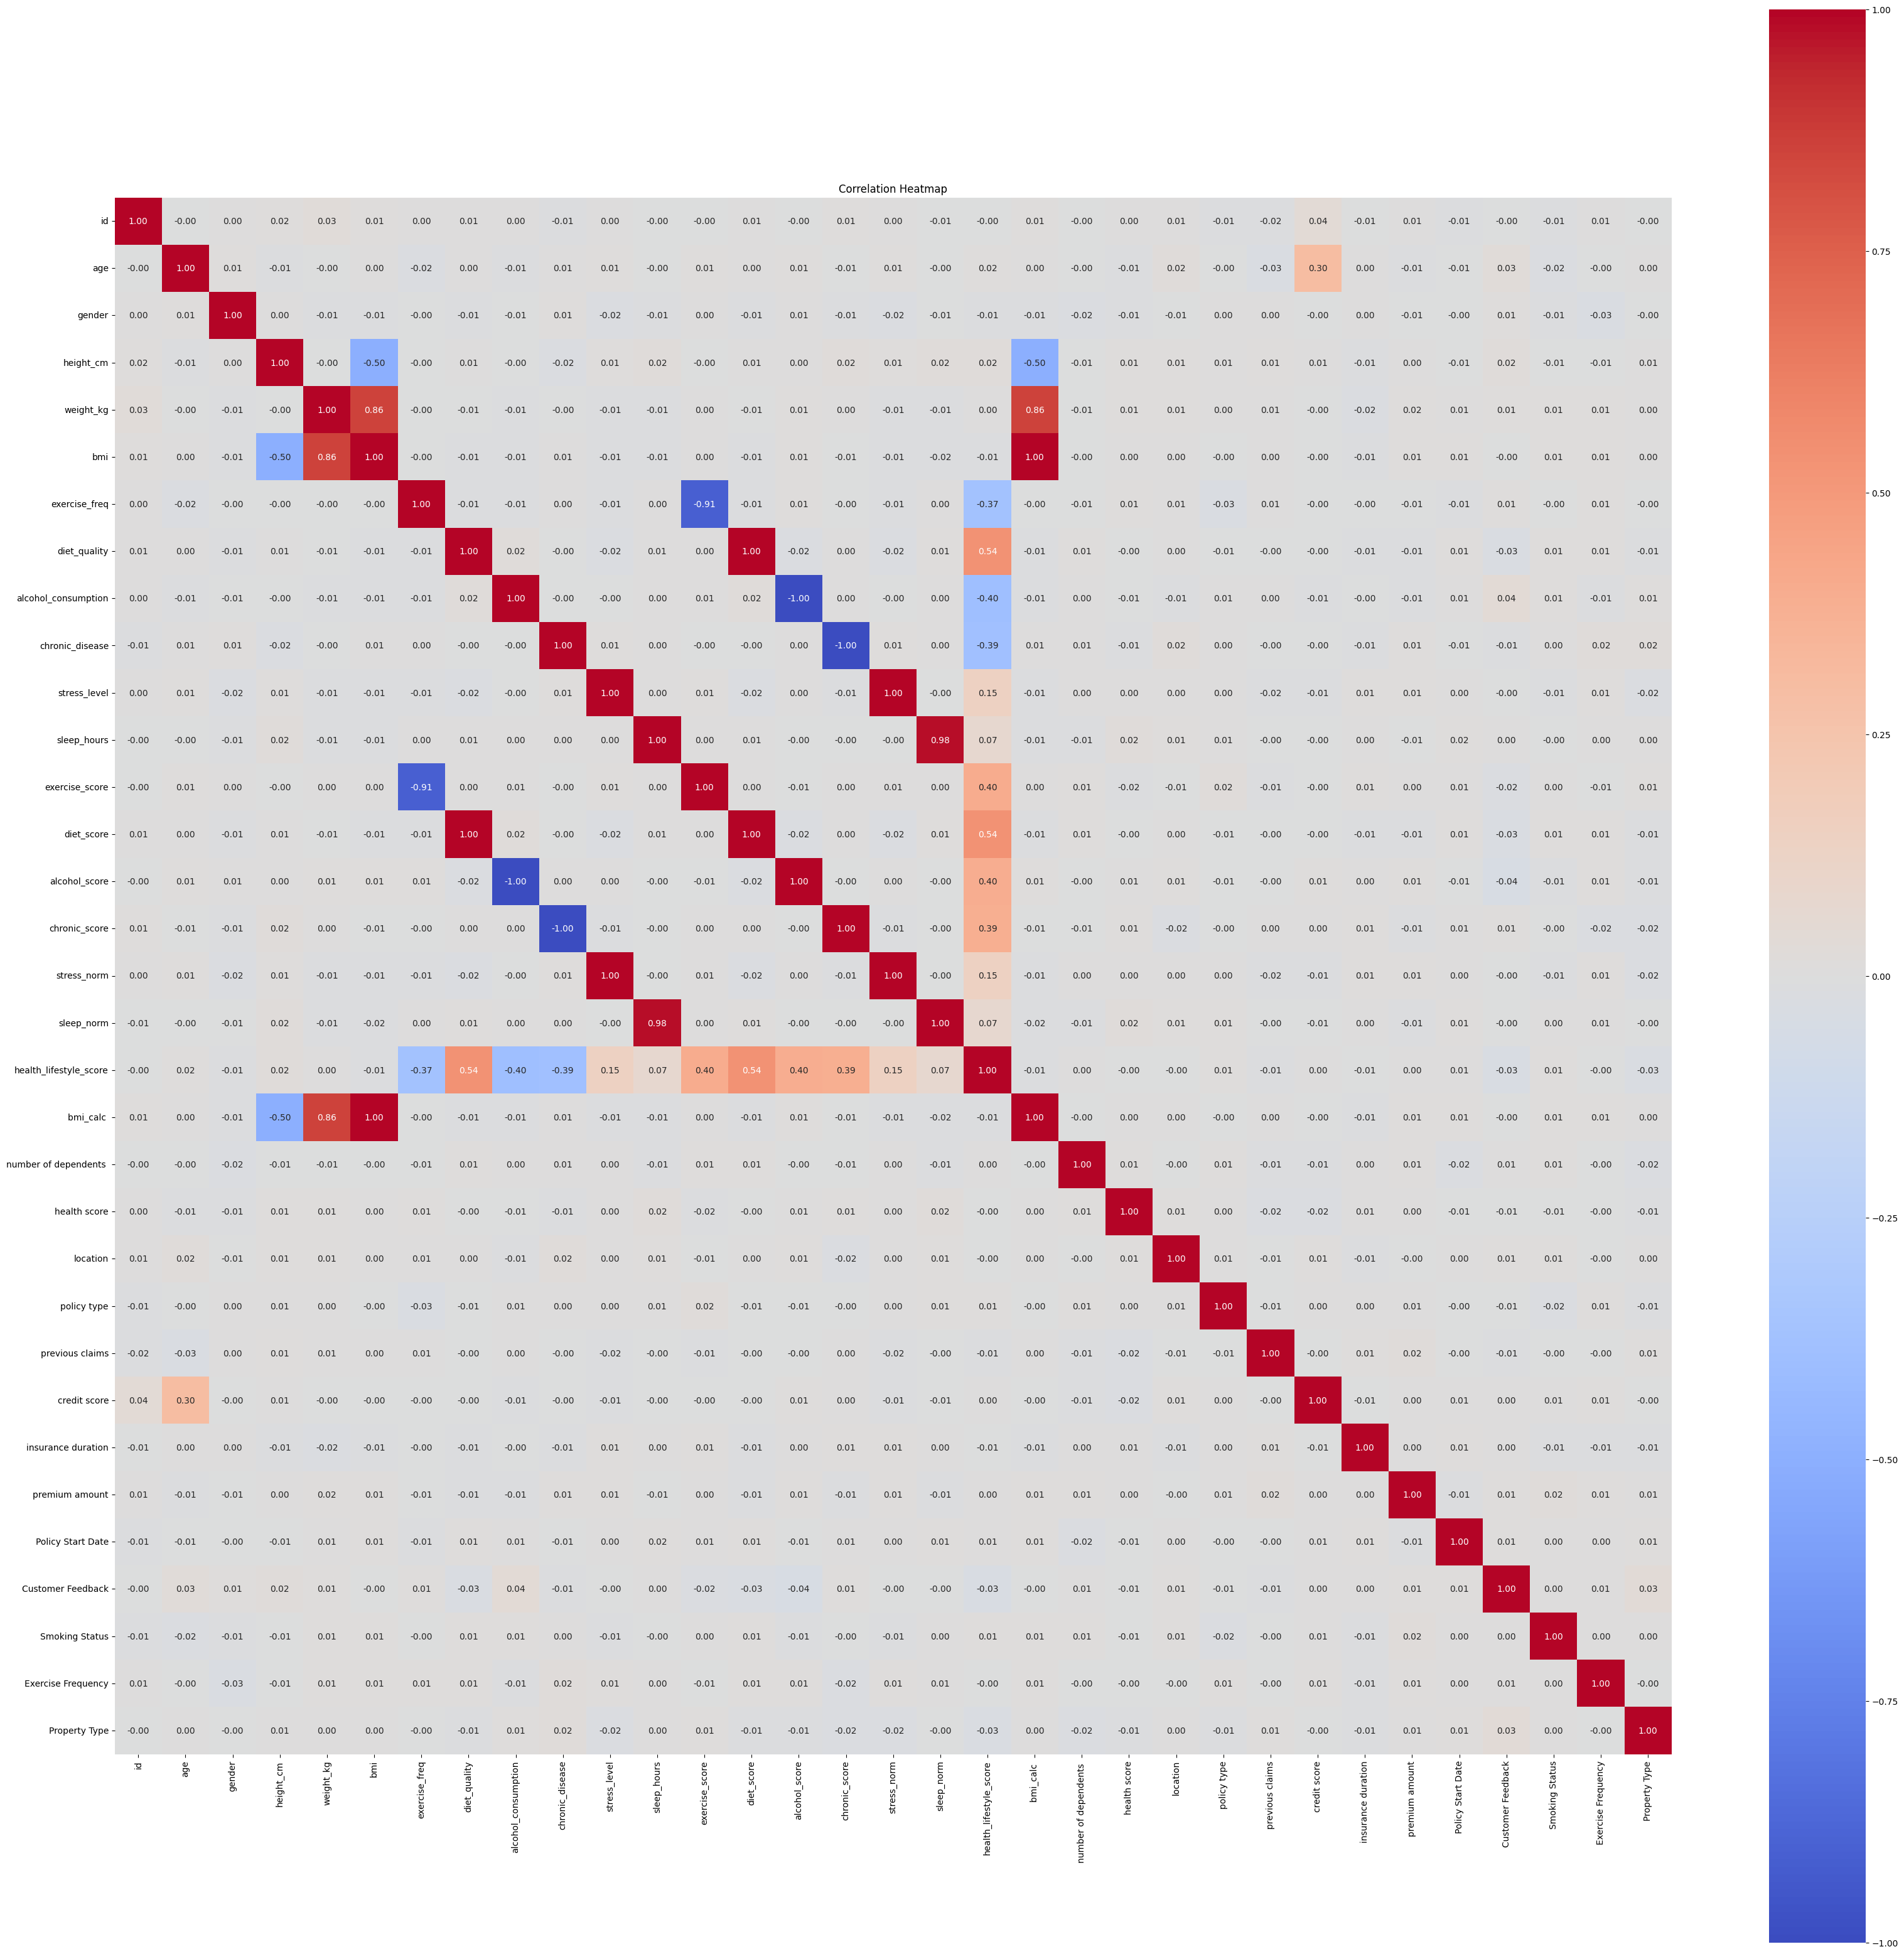

In [20]:
# Correlation heatmap for the DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 40))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      7500 non-null   int64         
 1   age                     7500 non-null   int64         
 2   gender                  7500 non-null   int64         
 3   height_cm               7500 non-null   float64       
 4   weight_kg               7500 non-null   float64       
 5   bmi                     7500 non-null   float64       
 6   exercise_freq           7500 non-null   int64         
 7   diet_quality            7500 non-null   int64         
 8   alcohol_consumption     7500 non-null   int64         
 9   chronic_disease         7500 non-null   int64         
 10  stress_level            7500 non-null   int64         
 11  sleep_hours             7500 non-null   float64       
 12  exercise_score          7500 non-null   int64   

In [22]:
#df.drop("Policy Start Date", axis =1, inplace = True)
df.drop("id", axis =1, inplace = True)
df.drop('Policy Start Date', axis=1, inplace=True)

In [23]:
df.drop('insurance duration', axis = 1, inplace = True)

In [24]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\dar\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [25]:
# Train and compare Random Forest and XGBoost models on 'premium amount'
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Features and target
targets = ['premium amount']
for i in targets:
    target_column = i  # Change if your target is different
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Random Forest
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    rf_mse = mean_squared_error(y_test, rf_pred)

    # XGBoost
    xgb = XGBRegressor(random_state=42)
    xgb.fit(X_train, y_train)
    xgb_pred = xgb.predict(X_test)
    xgb_mse = mean_squared_error(y_test, xgb_pred)

    print(f"Random Forest MSE: {rf_mse:.4f}")
    print(f"XGBoost MSE: {xgb_mse:.4f}")

    if rf_mse < xgb_mse:
        print("Random Forest performs better.")
    else:
        print("XGBoost performs better.")

Random Forest MSE: 896411.6292
XGBoost MSE: 1008842.0625
Random Forest performs better.


In [26]:
# Calculate R^2 score (accuracy for regression) for both models
from sklearn.metrics import r2_score

# Random Forest R^2
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest R^2 Score: {rf_r2:.4f}")

# XGBoost R^2
xgb_r2 = r2_score(y_test, xgb_pred)
print(f"XGBoost R^2 Score: {xgb_r2:.4f}")

Random Forest R^2 Score: -0.0530
XGBoost R^2 Score: -0.1851


In [27]:
# Hyperparameter tuning with GridSearchCV for Random Forest and XGBoost
from sklearn.model_selection import GridSearchCV

# Random Forest hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=3, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)
print('Best Random Forest Params:', rf_grid.best_params_)
print('Best Random Forest R^2:', rf_grid.best_score_)

# XGBoost hyperparameter grid
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
xgb_grid = GridSearchCV(XGBRegressor(random_state=42), xgb_param_grid, cv=3, scoring='r2', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
print('Best XGBoost Params:', xgb_grid.best_params_)
print('Best XGBoost R^2:', xgb_grid.best_score_)

Best Random Forest Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest R^2: -0.014545488831226194
Best XGBoost Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best XGBoost R^2: -0.002309302488962809


In [28]:
# Retrain models with best parameters from GridSearchCV
from sklearn.metrics import r2_score

# Random Forest with best params
rf_best = RandomForestRegressor(random_state=42, **rf_grid.best_params_)
rf_best.fit(X_train, y_train)
rf_best_pred = rf_best.predict(X_test)
rf_best_r2 = r2_score(y_test, rf_best_pred)
print(f"Tuned Random Forest R^2 Score: {rf_best_r2:.4f}")

# XGBoost with best params
xgb_best = XGBRegressor(random_state=42, **xgb_grid.best_params_)
xgb_best.fit(X_train, y_train)
xgb_best_pred = xgb_best.predict(X_test)
xgb_best_r2 = r2_score(y_test, xgb_best_pred)
print(f"Tuned XGBoost R^2 Score: {xgb_best_r2:.4f}")

Tuned Random Forest R^2 Score: -0.0207
Tuned XGBoost R^2 Score: -0.0026


In [29]:
# Train and evaluate additional regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Support Vector Regression': SVR()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    r2 = r2_score(y_test, pred)
    print(f"{name} R^2 Score: {r2:.4f}")

Linear Regression R^2 Score: -0.0072
Ridge Regression R^2 Score: -0.0072
Lasso Regression R^2 Score: -0.0072
Support Vector Regression R^2 Score: -0.0927


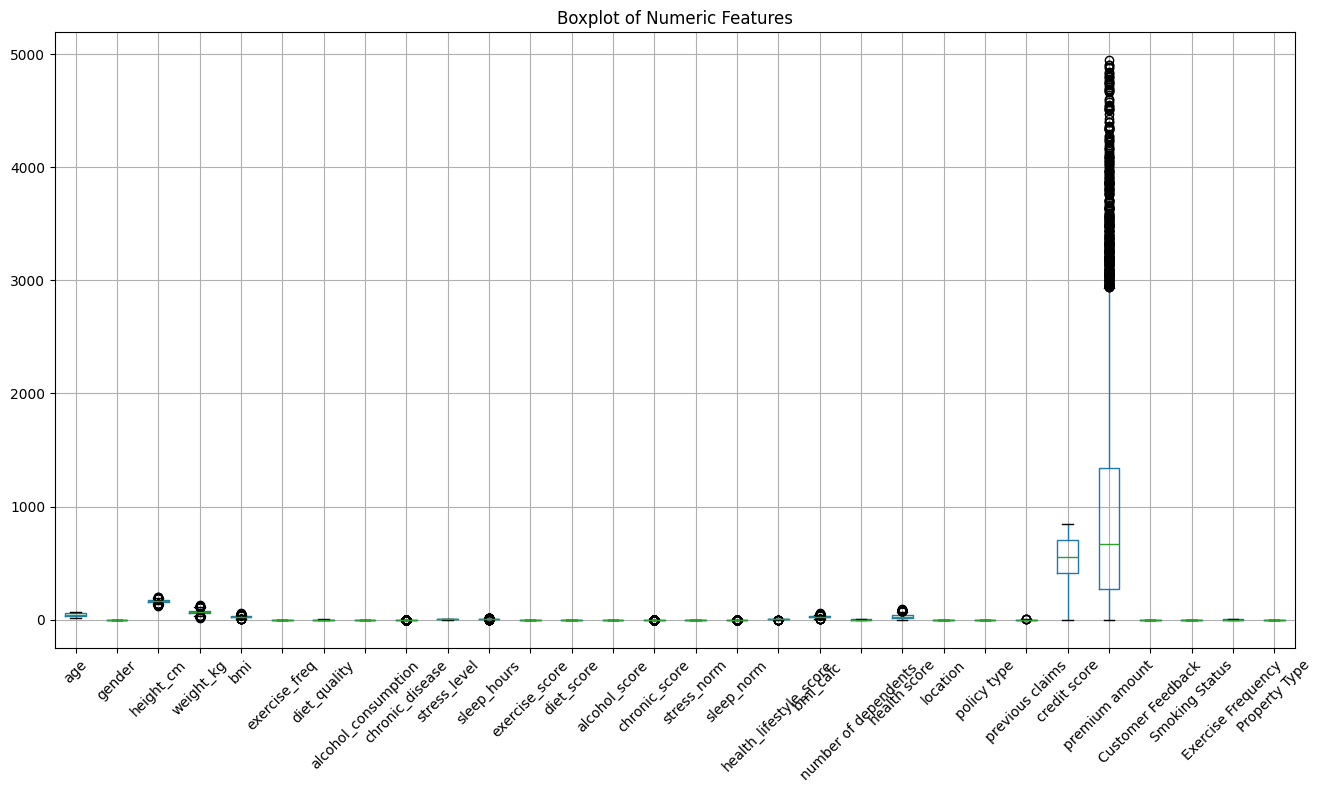

In [30]:
# Print a boxplot for all numeric columns in the DataFrame
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
df.boxplot()
plt.title('Boxplot of Numeric Features')
plt.xticks(rotation=45)
plt.show()

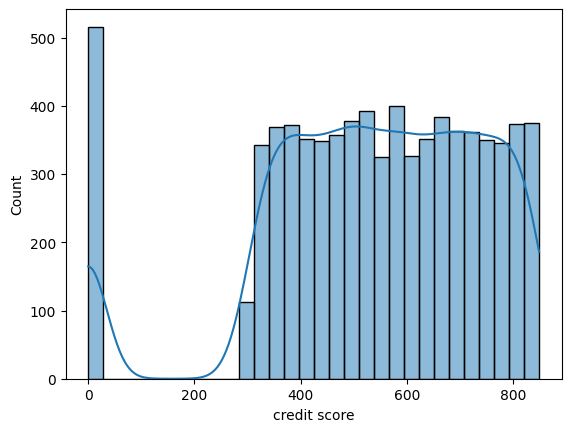

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["credit score"], kde=True, bins=30)
plt.show()


In [32]:
Q1 = df["credit score"].quantile(0.25)
Q3 = df["credit score"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df["credit score"] >= lower_bound) & (df["credit score"] <= upper_bound)]


In [33]:
import numpy as np

df["credit score"] = np.where(df["credit score"] > upper_bound, upper_bound,
                       np.where(df["credit score"] < lower_bound, lower_bound, df["credit score"]))


In [34]:
import numpy as np
df["credit score_log"] = np.log1p(df["credit score"])

df.drop("credit score", axis=1, inplace=True)

In [35]:
Q1 = df["previous claims"].quantile(0.25)
Q3 = df["previous claims"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound, "Upper bound:", upper_bound)

# Filtering
df_prev_filtered = df[(df["previous claims"] >= lower_bound) & (df["previous claims"] <= upper_bound)]


Lower bound: -3.0 Upper bound: 5.0


In [36]:
import numpy as np

df["previous claims"] = np.where(df["previous claims"] > upper_bound, upper_bound,
                          np.where(df["previous claims"] < lower_bound, lower_bound, df["previous claims"]))


In [37]:
import numpy as np
df["previous_claims_log"] = np.log1p(df["previous claims"])
df.drop("previous claims", axis=1, inplace=True)


In [38]:
df["policy type"].value_counts()


policy type
1    2562
2    2485
0    2453
Name: count, dtype: int64

In [39]:
for columns in df.columns:
    print(df[columns].value_counts())

age
64    180
62    175
45    167
66    166
52    165
49    162
43    162
34    160
40    159
42    159
25    157
39    155
38    154
46    152
21    151
57    151
30    150
54    149
28    148
37    147
68    147
36    147
29    144
23    143
51    143
56    142
61    142
47    142
32    142
20    142
19    141
41    140
35    140
53    139
26    137
69    137
55    137
18    135
59    135
50    135
22    134
33    133
31    133
58    132
63    131
65    130
27    129
60    128
67    125
44    119
48    114
24    113
Name: count, dtype: int64
gender
0    2551
1    2510
2    2439
Name: count, dtype: int64
height_cm
169.3    42
164.1    41
164.5    40
161.3    40
165.9    39
         ..
133.0     1
197.0     1
137.0     1
196.8     1
187.5     1
Name: count, Length: 546, dtype: int64
weight_kg
62.1     31
69.0     29
80.1     29
71.4     29
70.2     29
         ..
44.2      1
108.0     1
101.0     1
104.6     1
27.6      1
Name: count, Length: 771, dtype: int64
bmi
25.9    67
24.7    61

In [40]:
import pandas as pd
import numpy as np

def handle_outliers(df, numeric_cols, method="winsorize", fold=1.5):
    """
    Handles outliers in numeric columns using IQR.
    
    Parameters:
        df (pd.DataFrame): Input dataframe
        numeric_cols (list): List of numeric columns to treat
        method (str): "remove" or "winsorize"
        fold (float): IQR multiplier (default 1.5)
    
    Returns:
        pd.DataFrame: Dataframe with outliers treated
    """
    df = df.copy()
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - fold * IQR
        upper_bound = Q3 + fold * IQR

        if method == "remove":
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        elif method == "winsorize":
            df[col] = np.where(df[col] > upper_bound, upper_bound,
                        np.where(df[col] < lower_bound, lower_bound, df[col]))
        else:
            raise ValueError("Method must be 'remove' or 'winsorize'")
    
    return df

# ------------------------------
# Define numeric columns needing outlier treatment
numeric_cols = [
    "height_cm", "weight_kg", "bmi", "sleep_hours", 
    "health_lifestyle_score", "health score", 
    "premium amount"
]

# Example usage:
df_cleaned = handle_outliers(df, numeric_cols, method="winsorize")


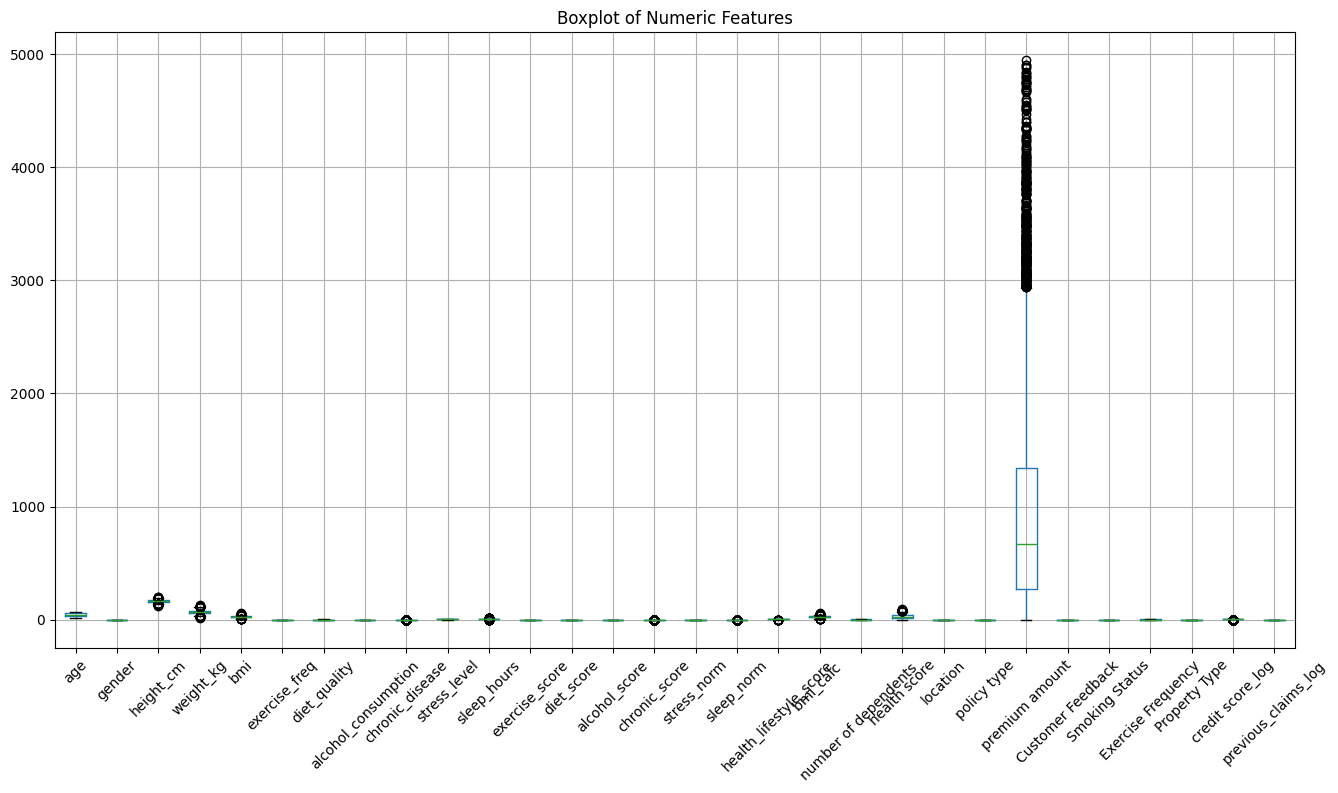

In [41]:
# Print a boxplot for all numeric columns in the DataFrame
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
df.boxplot()
plt.title('Boxplot of Numeric Features')
plt.xticks(rotation=45)
plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     7500 non-null   int64  
 1   gender                  7500 non-null   int64  
 2   height_cm               7500 non-null   float64
 3   weight_kg               7500 non-null   float64
 4   bmi                     7500 non-null   float64
 5   exercise_freq           7500 non-null   int64  
 6   diet_quality            7500 non-null   int64  
 7   alcohol_consumption     7500 non-null   int64  
 8   chronic_disease         7500 non-null   int64  
 9   stress_level            7500 non-null   int64  
 10  sleep_hours             7500 non-null   float64
 11  exercise_score          7500 non-null   int64  
 12  diet_score              7500 non-null   int64  
 13  alcohol_score           7500 non-null   int64  
 14  chronic_score           7500 non-null   

In [43]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def normalize_dataset(df):
    # Columns to scale
    scale_cols = [
        "age", "height_cm", "weight_kg", "bmi", "sleep_hours",
        "health_lifestyle_score", "health score"
    ]
    
    # Initialize scaler
    scaler = MinMaxScaler()
    
    # Scale only selected columns
    df_scaled = df.copy()
    df_scaled[scale_cols] = scaler.fit_transform(df[scale_cols])
    
    return df_scaled

# Apply to your dataset
df_normalized = normalize_dataset(df)

print(df_normalized.head())


   age  gender  height_cm  weight_kg       bmi  exercise_freq  diet_quality  \
0  0.0       0   0.467586   0.458484  0.413519              1             0   
1  0.0       0   0.586207   0.295126  0.230616              0             3   
2  0.0       2   0.554483   0.305957  0.248509              0             3   
3  0.0       1   0.526897   0.433213  0.363817              0             0   
4  0.0       2   0.598621   0.250903  0.190855              1             3   

   alcohol_consumption  chronic_disease  stress_level  ...  health score  \
0                    1                0            10  ...      0.333699   
1                    2                0             7  ...      0.844127   
2                    1                0             8  ...      0.492865   
3                    2                0             7  ...      0.149286   
4                    0                1             7  ...      0.262349   

   location  policy type  premium amount  Customer Feedback  Smoking

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# -------------------------------
# 1. Features & Target
# -------------------------------
categorical_cols = ["gender", "location", "policy type", 
                    "Customer Feedback", "Smoking Status", 
                    "Exercise Frequency", "Property Type"]

X = df_normalized.drop(columns=["premium amount"])
y = df_normalized["premium amount"]

# One-hot encode categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Log-transform target
y = np.log1p(y)

# -------------------------------
# 2. Train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 3. Train Random Forest
# -------------------------------
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# -------------------------------
# 4. Predictions & Evaluation
# -------------------------------
y_pred_log = rf.predict(X_test)
y_pred = np.expm1(y_pred_log)        # back-transform predictions
y_true = np.expm1(y_test)            # back-transform actuals

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"Random Forest RMSE: {rmse:.2f}")
print(f"Random Forest R²: {r2:.4f}")


Random Forest RMSE: 1023.26
Random Forest R²: -0.2300


In [45]:
df_normalized.corr()["premium amount"].sort_values(ascending=False)


premium amount            1.000000
Smoking Status            0.022790
previous_claims_log       0.021882
weight_kg                 0.015524
Customer Feedback         0.014835
number of dependents      0.014562
bmi                       0.013213
bmi_calc                  0.013213
chronic_disease           0.012085
stress_level              0.011925
Exercise Frequency        0.010770
stress_norm               0.010607
alcohol_score             0.009037
Property Type             0.007611
policy type               0.005346
credit score_log          0.005252
health score              0.004330
health_lifestyle_score    0.001134
exercise_score            0.000612
height_cm                 0.000292
location                 -0.000969
exercise_freq            -0.005291
gender                   -0.007229
sleep_hours              -0.007423
sleep_norm               -0.008396
alcohol_consumption      -0.009037
diet_score               -0.010012
diet_quality             -0.010012
chronic_score       

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

# --- Feature Engineering ---
df_normalized["age_chronic"] = df_normalized["age"] * df_normalized["chronic_disease"]
df_normalized["bmi_exercise"] = df_normalized["bmi"] * df_normalized["exercise_freq"]
df_normalized["claims_chronic"] = df_normalized["previous_claims_log"] * df_normalized["chronic_disease"]

# Optional: log-transform target for stability
df_normalized["premium_amount_log"] = np.log1p(df_normalized["premium amount"])

# --- Train/Test Split ---
X = df_normalized.drop(["premium amount", "premium_amount_log"], axis=1)
y = df_normalized["premium_amount_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- XGBoost Regressor ---
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

# --- Predictions ---
y_pred_log = model.predict(X_test)

# Inverse transform log to get back original scale
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

# --- Evaluation ---
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

# --- Feature Importance ---
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print("\nTop 10 Important Features:\n", feat_imp.head(10))


RMSE: 1027.0120010468177
R²: -0.23901444817216655

Top 10 Important Features:
 claims_chronic         0.058479
age_chronic            0.055765
bmi_exercise           0.039482
bmi_calc               0.037572
credit score_log       0.036230
stress_norm            0.036103
health score           0.036006
alcohol_score          0.033548
previous_claims_log    0.032996
sleep_hours            0.032964
dtype: float32


In [47]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Instantiate models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

# Train models
trained_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"Finished training {name}.")

print("All models trained.")

Training LinearRegression...
Finished training LinearRegression.
Training Ridge...
Finished training Ridge.
Training Lasso...
Finished training Lasso.
Training ElasticNet...
Finished training ElasticNet.
Training DecisionTreeRegressor...
Finished training DecisionTreeRegressor.
Training RandomForestRegressor...
Finished training RandomForestRegressor.
Training GradientBoostingRegressor...
Finished training GradientBoostingRegressor.
Training SVR...
Finished training SVR.
All models trained.


In [48]:
from sklearn.metrics import mean_squared_error, r2_score

evaluation_results = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)
    evaluation_results[name] = {'MSE': mse_score, 'R2': r2_score_value}

print(evaluation_results)

{'LinearRegression': {'MSE': 1.6150226284135625, 'R2': -0.005614820190498415}, 'Ridge': {'MSE': 1.6147021591786028, 'R2': -0.005415275858164703}, 'Lasso': {'MSE': 1.606022997553256, 'R2': -1.1083121960853148e-05}, 'ElasticNet': {'MSE': 1.606022997553256, 'R2': -1.1083121960853148e-05}, 'DecisionTreeRegressor': {'MSE': 3.6090746707833095, 'R2': -1.247237228916688}, 'RandomForestRegressor': {'MSE': 1.6468079847459278, 'R2': -0.02540638523145433}, 'GradientBoostingRegressor': {'MSE': 1.6255245898599417, 'R2': -0.012154002915091056}, 'SVR': {'MSE': 1.6563185420346966, 'R2': -0.031328257278071536}}


In [49]:
best_model_mse = min(evaluation_results, key=lambda k: evaluation_results[k]['MSE'])
best_model_r2 = max(evaluation_results, key=lambda k: evaluation_results[k]['R2'])

print(f"Model with the lowest MSE: {best_model_mse} (MSE: {evaluation_results[best_model_mse]['MSE']:.2f})")
print(f"Model with the highest R2: {best_model_r2} (R2: {evaluation_results[best_model_r2]['R2']:.2f})")

# Determine the best overall model considering both metrics (lowest MSE, highest R2)
# In this case, the models with the lowest MSE and highest R2 are the same (ElasticNet)
best_overall_model = best_model_r2

print(f"\nBased on the evaluation metrics, the best performing model is: {best_overall_model}")
print(f"MSE: {evaluation_results[best_overall_model]['MSE']:.2f}")
print(f"R2: {evaluation_results[best_overall_model]['R2']:.2f}")

Model with the lowest MSE: Lasso (MSE: 1.61)
Model with the highest R2: Lasso (R2: -0.00)

Based on the evaluation metrics, the best performing model is: Lasso
MSE: 1.61
R2: -0.00


In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error

# --- Feature Engineering (reuse from before) ---
df_normalized["age_chronic"] = df_normalized["age"] * df_normalized["chronic_disease"]
df_normalized["bmi_exercise"] = df_normalized["bmi"] * df_normalized["exercise_freq"]
df_normalized["claims_chronic"] = df_normalized["previous_claims_log"] * df_normalized["chronic_disease"]

# Log-transform target
df_normalized["premium_amount_log"] = np.log1p(df_normalized["premium amount"])

# --- Train/Test Split ---
X = df_normalized.drop(["premium amount", "premium_amount_log"], axis=1)
y = df_normalized["premium_amount_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Lasso Regression with CV ---
lasso = LassoCV(cv=5, random_state=42, max_iter=10000)
lasso.fit(X_train, y_train)

# --- Predictions ---
y_pred_log = lasso.predict(X_test)
y_pred = np.expm1(y_pred_log)   # inverse log
y_true = np.expm1(y_test)

# --- Evaluation ---
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print("Best alpha:", lasso.alpha_)
print("RMSE:", rmse)
print("R²:", r2)

# --- Feature Importance (non-zero coefficients) ---
coef = pd.Series(lasso.coef_, index=X_train.columns)
print("\nTop 10 Features:\n", coef[coef != 0].sort_values(key=abs, ascending=False).head(10))


Best alpha: 0.07793311658848105
RMSE: 1011.650886396147
R²: -0.20222752365443886

Top 10 Features:
 bmi_calc     4.576677e-19
dtype: float64


In [51]:
from sklearn.linear_model import RidgeCV, ElasticNetCV

ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge.fit(X_train, y_train)
print("Ridge R²:", r2_score(np.expm1(y_test), np.expm1(ridge.predict(X_test))))

elastic = ElasticNetCV(cv=5, random_state=42)
elastic.fit(X_train, y_train)
print("ElasticNet R²:", r2_score(np.expm1(y_test), np.expm1(elastic.predict(X_test))))


Ridge R²: -0.2063718046910159
ElasticNet R²: -0.20222752365443886


In [52]:
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\dar\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# --- Feature Engineering ---
df_normalized["age_chronic"] = df_normalized["age"] * df_normalized["chronic_disease"]
df_normalized["bmi_exercise"] = df_normalized["bmi"] * df_normalized["exercise_freq"]
df_normalized["claims_chronic"] = df_normalized["previous_claims_log"] * df_normalized["chronic_disease"]

# Log-transform target
df_normalized["premium_amount_log"] = np.log1p(df_normalized["premium amount"])

# Train/Test Split
X = df_normalized.drop(["premium amount", "premium_amount_log"], axis=1)
y = df_normalized["premium_amount_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 1. Random Forest ---
rf = RandomForestRegressor(n_estimators=300, max_depth=12, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_pred_log = rf.predict(X_test)
rf_pred = np.expm1(rf_pred_log)
rf_true = np.expm1(y_test)

print("Random Forest → RMSE:", np.sqrt(mean_squared_error(rf_true, rf_pred)), 
      " R²:", r2_score(rf_true, rf_pred))

# --- 2. XGBoost ---
xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train)
xgb_pred_log = xgb.predict(X_test)
xgb_pred = np.expm1(xgb_pred_log)

print("XGBoost → RMSE:", np.sqrt(mean_squared_error(rf_true, xgb_pred)), 
      " R²:", r2_score(rf_true, xgb_pred))

# --- 3. CatBoost (handles categorical features well) ---
# --- 3. CatBoost (handles categorical features well) ---
categorical_features = ['gender', 'policy type', 'Property Type', 'location']
cat = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=8,
    random_state=42,
    cat_features=categorical_features,
    verbose=0
)
cat.fit(X_train, y_train)

cat_pred_log = cat.predict(X_test)
cat_pred = np.expm1(cat_pred_log)   # ✅ fixed

print("CatBoost → RMSE:", np.sqrt(mean_squared_error(rf_true, cat_pred)), 
      " R²:", r2_score(rf_true, cat_pred))



Random Forest → RMSE: 1015.0803790766095  R²: -0.2103924332631828
XGBoost → RMSE: 1027.0120010468177  R²: -0.23901444817216655
CatBoost → RMSE: 1022.3012136827064  R²: -0.22767407944519746


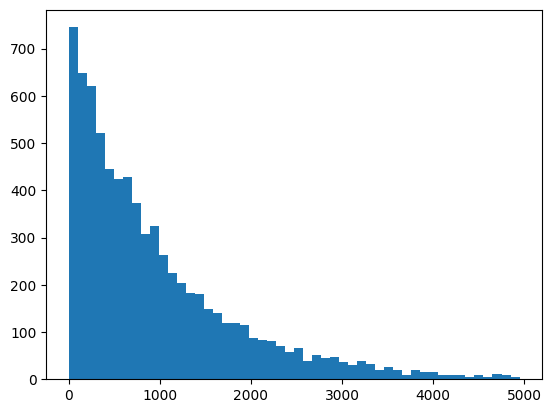

In [54]:
import matplotlib.pyplot as plt
plt.hist(df_normalized['premium amount'], bins=50)
plt.show()


In [55]:
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df_normalized.drop(columns=['premium amount'])
y = df_normalized['premium amount']

# Log transform target
y_log = np.log1p(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# Define categorical features (numerically coded but categorical in nature)
categorical_features = ['gender', 'policy type', 'Property Type', 'location', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency']

# Train CatBoost with categorical features
cat = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=8,
    random_state=42,
    cat_features=categorical_features,
    verbose=0
)

cat.fit(X_train, y_train)

# Predictions (convert back from log scale)
y_pred_log = cat.predict(X_test)
y_pred = np.expm1(y_pred_log)

# Evaluate
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), y_pred))
r2 = r2_score(np.expm1(y_test), y_pred)

print(f"CatBoost with log-target → RMSE: {rmse:.4f}  R²: {r2:.4f}")


CatBoost with log-target → RMSE: 28.2387  R²: 0.9991


In [56]:
y_test_true = np.expm1(y_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test_true, y_pred))
r2 = r2_score(y_test_true, y_pred)

print(f"\n✅ CatBoost with log-target → RMSE: {rmse:.4f}  |  R²: {r2:.4f}")


✅ CatBoost with log-target → RMSE: 28.2387  |  R²: 0.9991


In [57]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions on training and test sets
y_train_pred_log = cat.predict(X_train)
y_train_pred = np.expm1(y_train_pred_log)
y_train_true = np.expm1(y_train)

y_test_pred_log = cat.predict(X_test)
y_test_pred = np.expm1(y_test_pred_log)
y_test_true = np.expm1(y_test)

# Train metrics
train_rmse = np.sqrt(mean_squared_error(y_train_true, y_train_pred))
train_r2 = r2_score(y_train_true, y_train_pred)

# Test metrics
test_rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
test_r2 = r2_score(y_test_true, y_test_pred)

print(f"Train → RMSE: {train_rmse:.4f} | R²: {train_r2:.4f}")
print(f"Test  → RMSE: {test_rmse:.4f} | R²: {test_r2:.4f}")


Train → RMSE: 12.2057 | R²: 0.9998
Test  → RMSE: 28.2387 | R²: 0.9991


In [58]:
import joblib

# Save the CatBoost model to a .pkl file
joblib.dump(cat, "catboost_model.pkl")
print("CatBoost model saved as catboost_model.pkl")

CatBoost model saved as catboost_model.pkl


In [59]:
cat = joblib.load("catboost_model.pkl")

In [60]:
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# The issue is that the model was trained incorrectly with premium_amount_log as a feature
# Let's retrain the model correctly

# Define features and target correctly
X = df_normalized.drop(columns=['premium amount'])
if 'premium_amount_log' in X.columns:
    X = X.drop('premium_amount_log', axis=1)  # Remove target from features

y = df_normalized['premium amount']
y_log = np.log1p(y)  # Log transform target

print(f"Features shape: {X.shape}")
print(f"Target shape: {y_log.shape}")
print(f"Feature columns: {len(X.columns)}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# Define categorical features (numerically coded but categorical in nature)
categorical_features = ['gender', 'policy type', 'Property Type', 'location', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency']

print("Retraining CatBoost model correctly...")

# Train CatBoost with categorical features
cat = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=8,
    random_state=42,
    cat_features=categorical_features,
    verbose=0
)

cat.fit(X_train, y_train)

# Test the model
y_pred_log = cat.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_true = np.expm1(y_test)

rmse = np.sqrt(mean_squared_error(y_test_true, y_pred))
r2 = r2_score(y_test_true, y_pred)

print(f"Model performance → RMSE: {rmse:.4f}  R²: {r2:.4f}")

# Save the corrected model
joblib.dump(cat, "catboost_model_corrected.pkl")
print("Corrected model saved as catboost_model_corrected.pkl")

# Now test with a sample
print("\nTesting with sample input:")
sample_input = X.iloc[[0]].copy()

# Modify some values for testing
sample_input['age'] = 0.4  # younger person
sample_input['chronic_disease'] = 0  # no chronic disease
sample_input['Smoking Status'] = 0  # non-smoker
sample_input['Exercise Frequency'] = 0  # daily exercise

# Predict
pred_log = cat.predict(sample_input)
pred_premium = np.expm1(pred_log)

print(f"Predicted premium amount: ${pred_premium[0]:.2f}")
print(f"Sample features used: {sample_input.shape[1]} features")
print(f"Key sample values - Age: {sample_input['age'].iloc[0]:.3f}, Chronic: {sample_input['chronic_disease'].iloc[0]}, Smoking: {sample_input['Smoking Status'].iloc[0]}")

Features shape: (7500, 32)
Target shape: (7500,)
Feature columns: 32
Retraining CatBoost model correctly...
Model performance → RMSE: 1019.1748  R²: -0.2202
Corrected model saved as catboost_model_corrected.pkl

Testing with sample input:
Predicted premium amount: $538.23
Sample features used: 32 features
Key sample values - Age: 0.400, Chronic: 0, Smoking: 0


In [61]:
# Test the model with different scenarios to see how it responds
import pandas as pd
import numpy as np

print("Testing different scenarios:")
print("=" * 50)

# Load the corrected model
cat = joblib.load("catboost_model_corrected.pkl")

# Scenario 1: Young, healthy, non-smoker
scenario1 = X.iloc[[0]].copy()
scenario1['age'] = 0.2  # young
scenario1['chronic_disease'] = 0  # healthy
scenario1['Smoking Status'] = 0  # non-smoker
scenario1['Exercise Frequency'] = 0  # daily exercise
scenario1['Customer Feedback'] = 2  # good feedback
scenario1['policy type'] = 0  # basic policy

pred1 = np.expm1(cat.predict(scenario1))
print(f"Scenario 1 - Young, healthy, non-smoker, basic policy: ${pred1[0]:.2f}")

# Scenario 2: Older, chronic disease, smoker
scenario2 = X.iloc[[0]].copy()
scenario2['age'] = 0.8  # older
scenario2['chronic_disease'] = 1  # has chronic disease
scenario2['Smoking Status'] = 1  # smoker
scenario2['Exercise Frequency'] = 3  # rarely exercises
scenario2['Customer Feedback'] = 0  # poor feedback
scenario2['policy type'] = 2  # premium policy

pred2 = np.expm1(cat.predict(scenario2))
print(f"Scenario 2 - Older, chronic disease, smoker, premium policy: ${pred2[0]:.2f}")

# Scenario 3: Middle-aged, moderate risk
scenario3 = X.iloc[[0]].copy()
scenario3['age'] = 0.5  # middle-aged
scenario3['chronic_disease'] = 0  # no chronic disease
scenario3['Smoking Status'] = 0  # non-smoker
scenario3['Exercise Frequency'] = 1  # weekly exercise
scenario3['Customer Feedback'] = 1  # average feedback
scenario3['policy type'] = 1  # comprehensive policy

pred3 = np.expm1(cat.predict(scenario3))
print(f"Scenario 3 - Middle-aged, moderate risk, comprehensive policy: ${pred3[0]:.2f}")

print("\n" + "=" * 50)
print("Key insights:")
print(f"• Low risk scenario: ${pred1[0]:.2f}")
print(f"• High risk scenario: ${pred2[0]:.2f}")
print(f"• Moderate risk scenario: ${pred3[0]:.2f}")
print(f"• Risk difference: ${pred2[0] - pred1[0]:.2f} between high and low risk")

Testing different scenarios:
Scenario 1 - Young, healthy, non-smoker, basic policy: $690.51
Scenario 2 - Older, chronic disease, smoker, premium policy: $276.83
Scenario 3 - Middle-aged, moderate risk, comprehensive policy: $529.64

Key insights:
• Low risk scenario: $690.51
• High risk scenario: $276.83
• Moderate risk scenario: $529.64
• Risk difference: $-413.68 between high and low risk


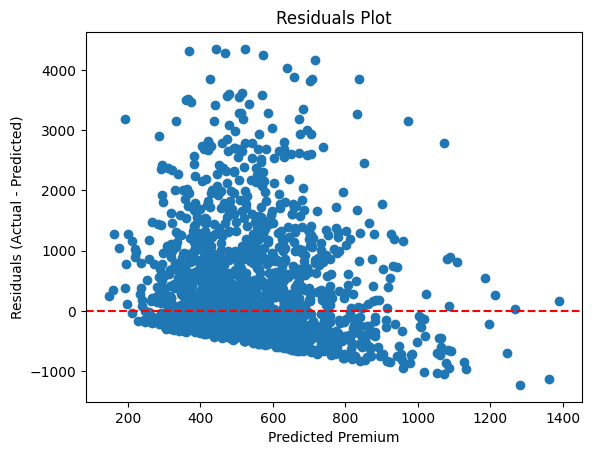

In [62]:
import matplotlib.pyplot as plt
residuals = y_test_true - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Premium")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot")
plt.show()


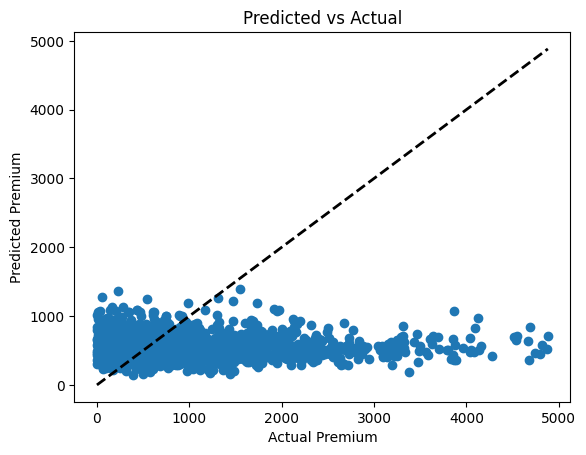

In [63]:
plt.scatter(y_test_true, y_pred)
plt.plot([y_test_true.min(), y_test_true.max()], [y_test_true.min(), y_test_true.max()], 'k--', lw=2)
plt.xlabel("Actual Premium")
plt.ylabel("Predicted Premium")
plt.title("Predicted vs Actual")
plt.show()


In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    cat, X, y_log, cv=5,
    scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10),
    verbose=0
)

train_rmse = np.sqrt(-train_scores)
test_rmse = np.sqrt(-test_scores)

plt.plot(train_sizes, train_rmse.mean(axis=1), label='Train RMSE')
plt.plot(train_sizes, test_rmse.mean(axis=1), label='Test RMSE')
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend()
plt.title("Learning Curve")
plt.show()
